In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from functools import cache

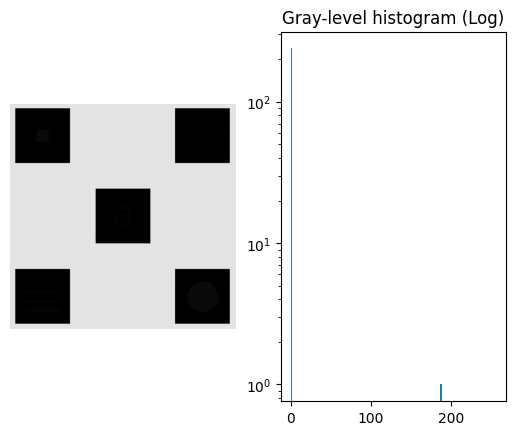

In [49]:
image_bgr = cv2.imread('../assets/embedded-squares.png')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
histogram_values, histogram_bins = np.histogram(image_gray.flatten(), bins=256, range=(0, 256))

plt.subplots(1, 2)

plt.subplot(1, 2, 1)
plt.axis("off")
_ = plt.imshow(image_gray, cmap="gray", vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.title("Gray-level histogram (Log)")
_ = plt.hist(histogram_values, histogram_bins, log=True)

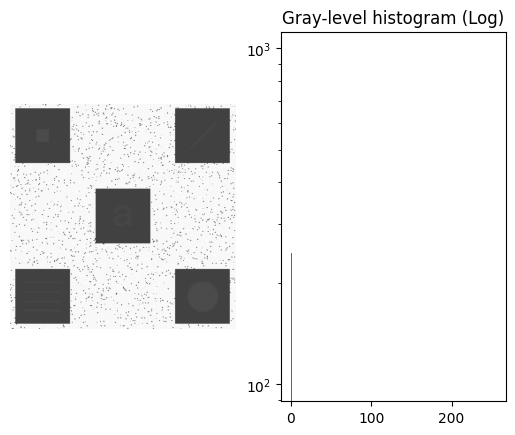

In [64]:
def create_transformation_function(histogram_values: np.ndarray):
    cdf = (histogram_values / histogram_values.sum()).cumsum()

    def transformation_function(pixel_value: float):
        return np.ceil(cdf[pixel_value] * 255)

    return transformation_function
    
transform = create_transformation_function(histogram_values)
processed_image = [transform(x) for x in image_gray.flatten()]
processed_image = np.array(processed_image).reshape(image_gray.shape)

processed_histogry_values, processed_histogram_bins = np.histogram(
    processed_image.flatten(), bins=256, range=(0, 255))

plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.axis("off")
_ = plt.imshow(processed_image, cmap="gray", vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.title("Gray-level histogram (Log)")
_ = plt.hist(processed_histogry_values, processed_histogram_bins, log=True)

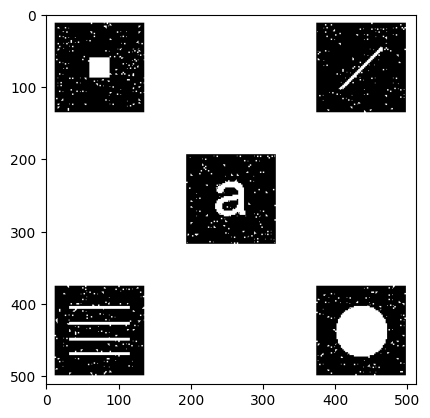

In [95]:
x = image_gray.copy()
t = 1
x[x < t] = 0
x[x >= t] = 255
plt.imshow(x, cmap="gray", vmin=0, vmax=255)

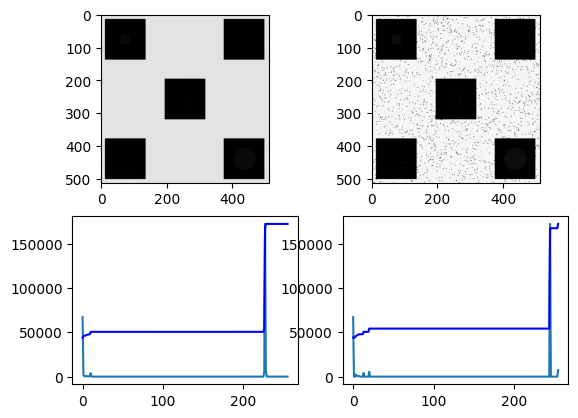

In [36]:
img = cv2.imread('../assets/embedded-squares.png', cv2.IMREAD_GRAYSCALE)
# img = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
img_hist = cv2.calcHist([img], [0], None, [256], [0, 256])
img_cdf = img_hist.cumsum()
img_cdf_normalized = img_cdf / img_cdf.max() * float(img_hist.max())

eq = cv2.equalizeHist(img)
eq_hist = cv2.calcHist([eq], [0], None, [256], [0, 256])
eq_cdf = eq_hist.cumsum()
eq_cdf_normalized = eq_cdf / eq_cdf.max() * float(eq_hist.max())

plt.subplot(221)
plt.imshow(img, cmap="gray", vmin=0, vmax=256)
plt.subplot(223)
plt.plot(img_hist)
plt.plot(img_cdf_normalized, color="blue")

plt.subplot(222)
plt.imshow(eq, cmap="gray", vmin=0, vmax=256)
plt.subplot(224)
plt.plot(eq_hist)
plt.plot(eq_cdf_normalized, color="blue")

plt.show()

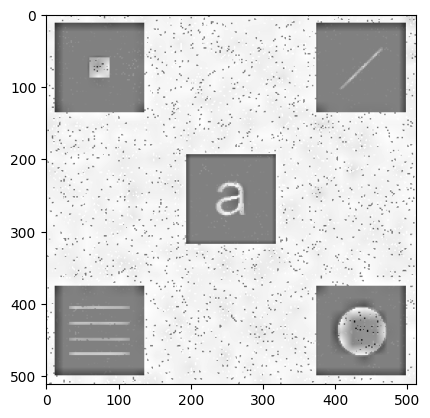

In [142]:
img = cv2.imread('../assets/embedded-squares.png', cv2.IMREAD_GRAYSCALE)
obj = cv2.createCLAHE(clipLimit=128, tileGridSize=(32, 32))
img = obj.apply(img)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure()
plt.imshow(img, cmap="gray", vmin=0, vmax=255)

# plt.subplot(212)
# plt.plot(hist)
# plt.plot(cdf_normalized, color="blue")

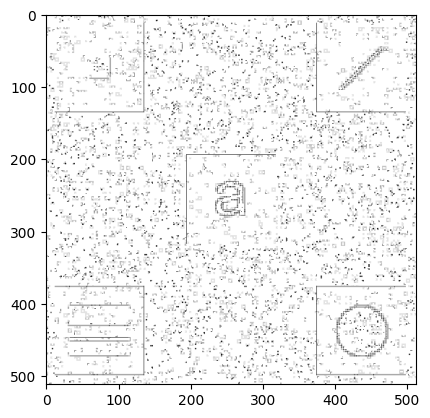

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def limit_contrast(cdf, contrast_limit):
    excess = 0
    for i, v in enumerate(cdf):
        if v > contrast_limit:
            excess += v - contrast_limit
            cdf[i] = contrast_limit
    cdf[:] = cdf + (excess / cdf.size)

def equalize(arr: np.ndarray, contrast_limit: int):
    hist, _ = np.histogram(arr, 256, (0, 256))
    cdf = hist.cumsum()
    cdf = cdf / cdf.max() * 255
    limit_contrast(cdf, contrast_limit)
    arr[:] = cdf[arr]

image = cv2.imread('../assets/embedded-squares.png', cv2.IMREAD_GRAYSCALE)

contrast_limit = 256
kernel_width = 3
kernel_height = 3

for kernel_top in range(0, image.shape[0], kernel_height):
    for kernel_left in range(0, image.shape[1], kernel_width):
        strip = image[kernel_top:(kernel_top+kernel_height), kernel_left:(kernel_left+kernel_width)]
        equalize(strip, contrast_limit)

_ = plt.imshow(image, cmap="gray", vmin=0, vmax=255)
